 ## Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

## Fetch the Satelite image dataset

In [4]:
cloudy =glob.glob('/kaggle/input/satelites-image-dataset/Satelite image Dataset/data/cloudy/*.jpg')
desert =glob.glob('/kaggle/input/satelites-image-dataset/Satelite image Dataset/data/desert/*.jpg')
green_area =glob.glob('/kaggle/input/satelites-image-dataset/Satelite image Dataset/data/green_area/*.jpg')
water =glob.glob('/kaggle/input/satelites-image-dataset/Satelite image Dataset/data/water/*.jpg')

## Fetch the training data

In [5]:
cloudy_train= cloudy[0:500]
desert_train= desert[0:500]
green_area_train= green_area[0:500]
water_train= water[0:500]

## Fetch the testing set

In [6]:
cloudy_test= cloudy[500:650]
desert_test= desert[500:650]
green_area_test= green_area[500:650]
water_test= water[500:650]

## Create a list with the images and a seperate one with its corresponding labels for both training and testing set  

In [7]:
images=[]
labels=[]
for i in cloudy_train:
    img= plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert_train:
    img= plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area_train:
    img= plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water_train:
    img= plt.imread(i)
    images.append(img)
    labels.append(3)



In [8]:
image_test=[]
label_test=[]

for i in cloudy_test:
    img= plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in desert_test:
    img= plt.imread(i)
    image_test.append(img)
    label_test.append(1)

for i in green_area_test:
    img= plt.imread(i)
    image_test.append(img)
    label_test.append(2)

for i in desert_test:
    img= plt.imread(i)
    image_test.append(img)
    label_test.append(3)

## Shuffle both images and labels

In [9]:
images ,labels= shuffle(images, labels, random_state=100)

In [10]:
image_test ,label_test= shuffle(image_test, label_test, random_state=100)

## Plot a few images of Both Categories

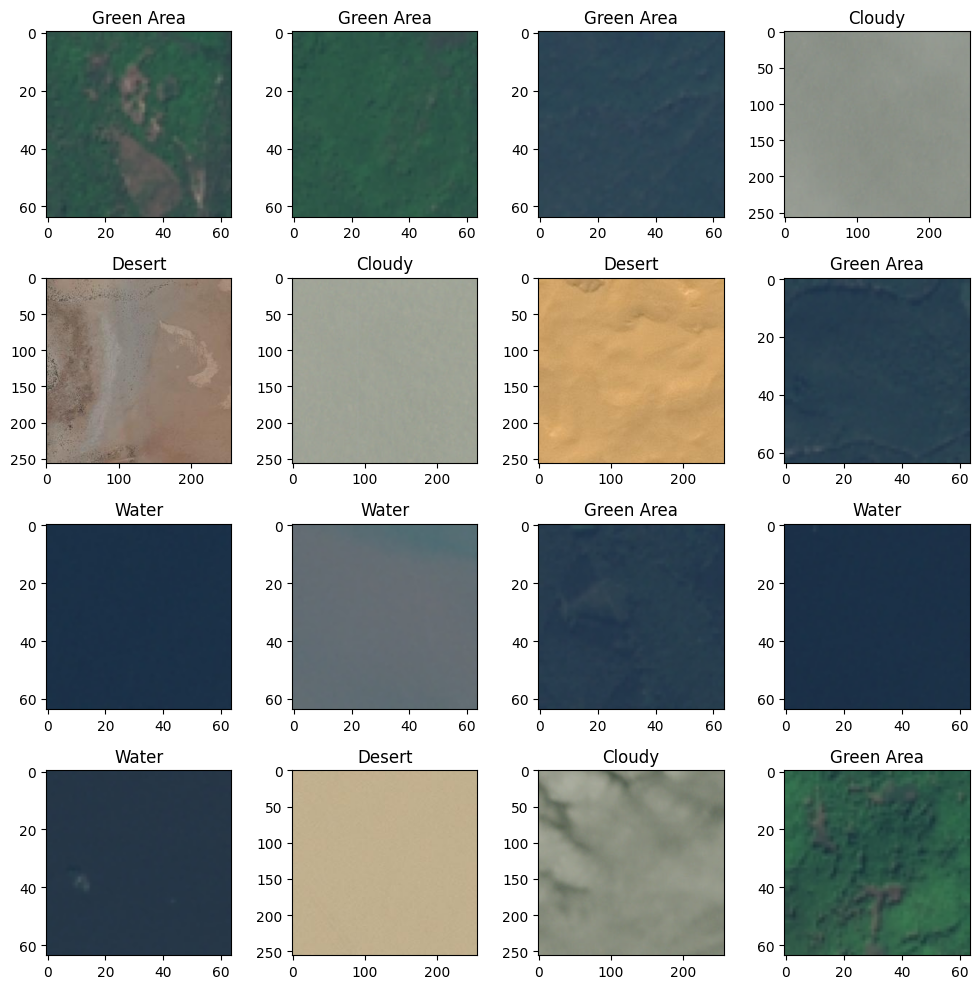

In [11]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    if labels[i]==0:
        plt.title('Cloudy')

    elif labels[i]==1:
        plt.title('Desert')

    elif labels[i]==2:
        plt.title('Green Area')

    else:
        plt.title('Water')

plt.tight_layout()
    

## resize the images ,convert to Numpy array and store it in X_train and X_test 

In [12]:
X_train=[]

for i in images:
    X_train.append(resize(i,(64,64,3)))

X_train=np.array(X_train)


In [13]:
X_test=[]

for i in image_test:
    X_test.append(resize(i,(64,64,3)))

X_test=np.array(X_test)

## convert labels to numpy array and store it in y_train and y_test 

In [14]:
y_train =np.array(labels)

y_test =np.array(label_test)

## Plot some of the resized images

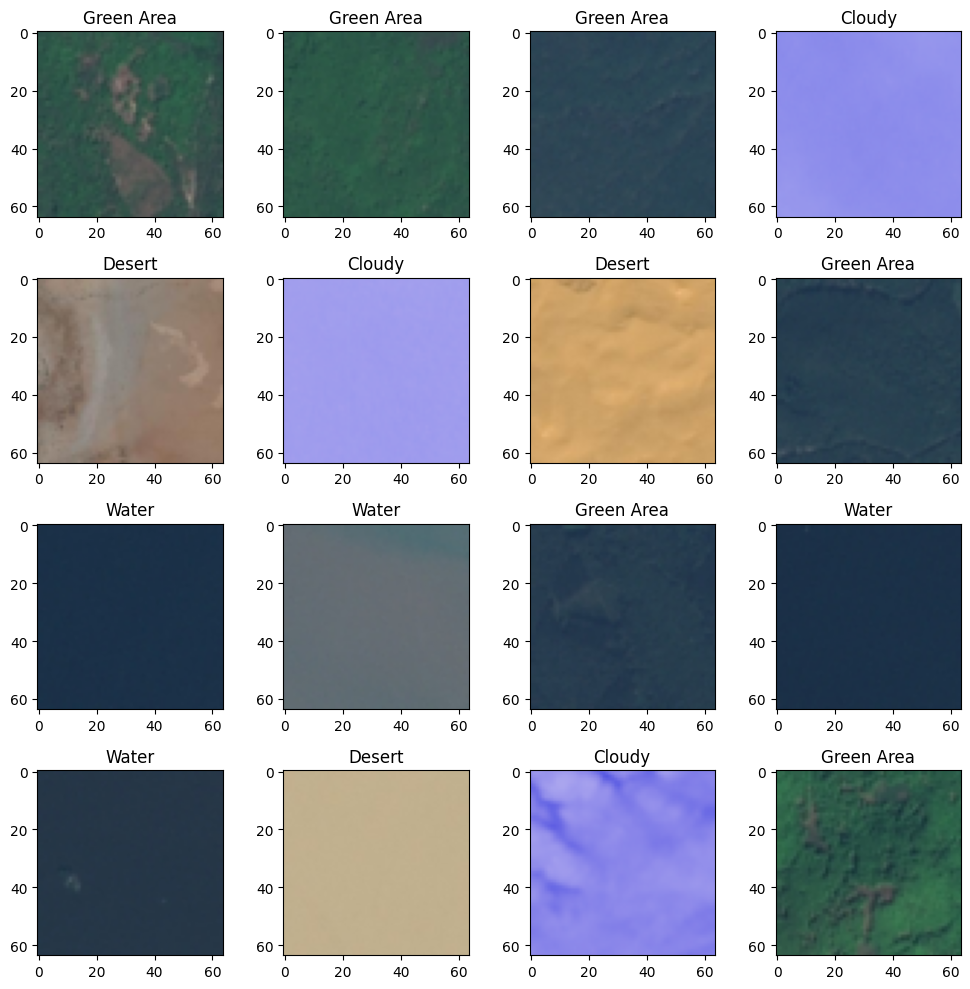

In [15]:
plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])

    if y_train[i]==0:
        plt.title('Cloudy')

    elif y_train[i]==1:
        plt.title('Desert')

    elif y_train[i]==2:
        plt.title('Green Area')

    else :
        plt.title('Water')

plt.tight_layout()


    


    

## Check the shape of X_train,X_test,y_train,y_test  

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 64, 64, 3)
(600, 64, 64, 3)
(2000,)
(600,)


## Create keras sequential model   

In [17]:
model = keras.models.Sequential([
             keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(64, 64, 3)),
             keras.layers.MaxPool2D(2,2),

             keras.layers.Conv2D(32,(3,3), activation= 'relu'),
             keras.layers.MaxPool2D(2,2),

             keras.layers.Flatten(),

             keras.layers.Dense(100, activation='relu'),
             keras.layers.Dense(100, activation='relu'),
             keras.layers.Dense(4, activation='softmax')          

                         
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile our model

In [18]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

## Check the model summary

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,892 (2.45 MB)

 Trainable params: 642,892 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

## Train our model with X_train and y_train

In [20]:
model.fit(X_train, y_train, epochs =8, validation_split =0.2)

Epoch 1/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.4694 - loss: 1.0221 - val_accuracy: 0.8075 - val_loss: 0.3005
Epoch 2/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8332 - loss: 0.3076 - val_accuracy: 0.9300 - val_loss: 0.2040
Epoch 3/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8856 - loss: 0.2591 - val_accuracy: 0.9525 - val_loss: 0.1699
Epoch 4/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8959 - loss: 0.2377 - val_accuracy: 0.9550 - val_loss: 0.1613
Epoch 5/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9164 - loss: 0.1961 - val_accuracy: 0.8750 - val_loss: 0.2447
Epoch 6/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9039 - loss: 0.2130 - val_accuracy: 0.9500 - val_loss: 0.1849
Epoch 7/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9191 - loss: 0.1956 - val_accuracy: 0.9350 - val_loss: 0.1432
Epoch 8/8
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9257 - loss: 0.1534 - val_accuracy: 0.9775 - val_loss:

##  Evaluate our model

In [21]:
model.evaluate(X_train, y_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9637 - loss: 0.1189


[0.11678127944469452, 0.9639999866485596]

## Make predictions with X_test

In [22]:
prediction = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


## Use np.argmax to fetch indices of max element of the array

In [23]:
pred =[]
for i in prediction:
   pred.append(np.argmax(i)) 

In [24]:
pred[:16]

[2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0]

## Plot X_test with labels from our prediction

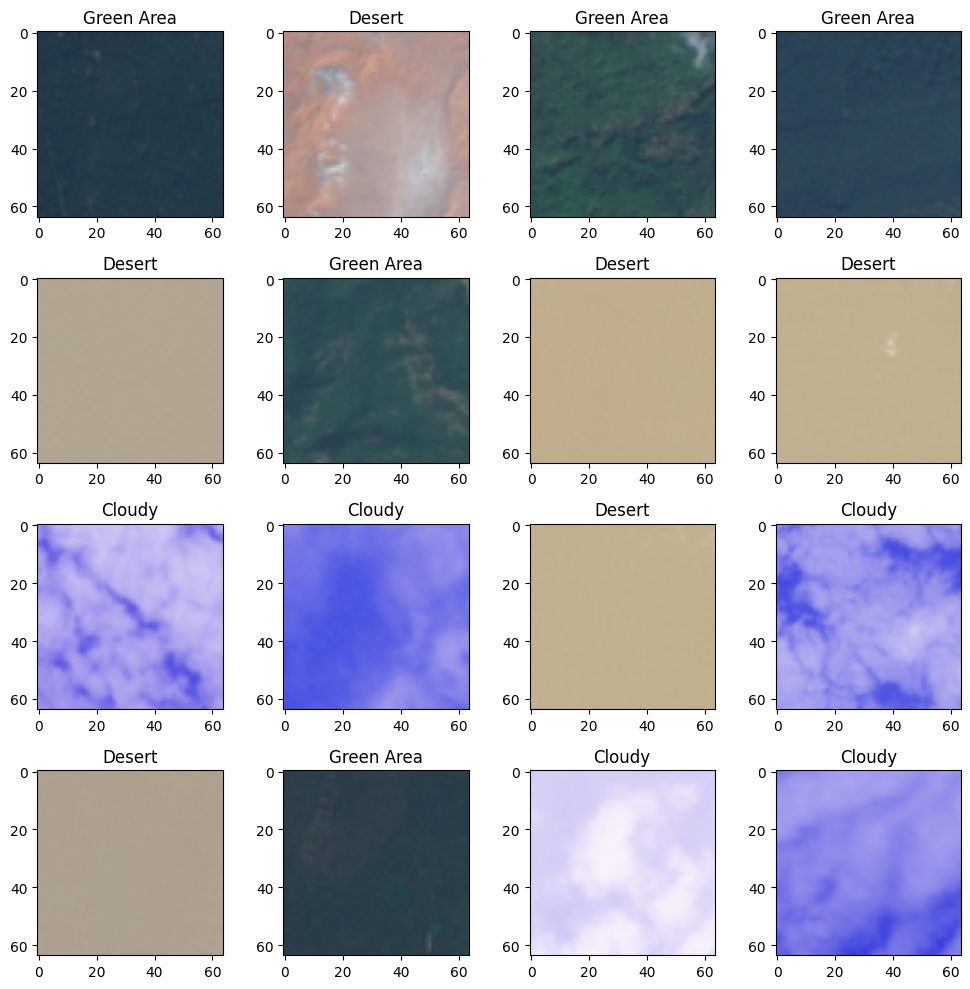

In [25]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i])

    if pred[i]==0:
        plt.title('Cloudy')

    elif pred[i]==1:
        plt.title('Desert')

    elif pred[i]==2:
        plt.title('Green Area')

    else:
        plt.title('Water')

plt.tight_layout()

## plot confusion matrix on heat map 

<Axes: >

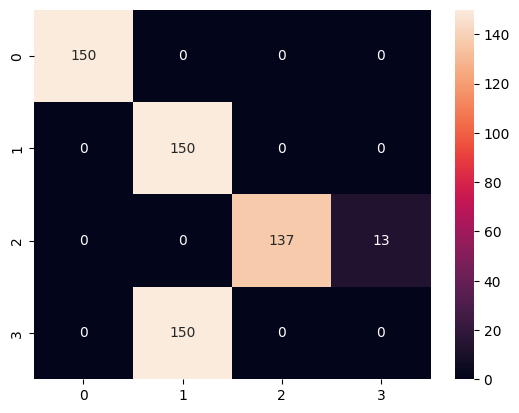

In [26]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')